#**Anomaly Detection in Network Traffic**

###***Importing Dependencies***

In [1]:
import numpy as np

In [4]:
import pandas as pd
random_seed = np.random.RandomState(12)

In [7]:
# Training Data
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns=["x", "y"])

In [8]:
#Testing Data
X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns=["x", "y"])

In [9]:
X_outliers = random_seed.uniform(low=-5, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])

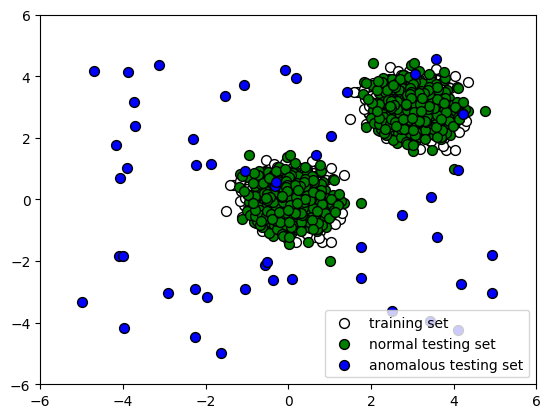

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50, edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="blue", s=50, edgecolor="black")
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training set", "normal testing set", "anomalous testing set"],
    loc="lower right",
)

plt.show()

###***Training Model***

In [11]:
# Now we will train an Isolation Forest model on our training data
from sklearn.ensemble import IsolationForest

clf = IsolationForest()
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [13]:
X_outliers = X_outliers.assign(pred=y_pred_outliers)
X_outliers.head()

,x,y,pred
0,1.415972,3.499366,-1
1,-3.898739,1.012180,-1
2,-4.978582,-3.320093,-1
3,-0.308416,0.425476,1
4,-1.967229,-3.162033,-1


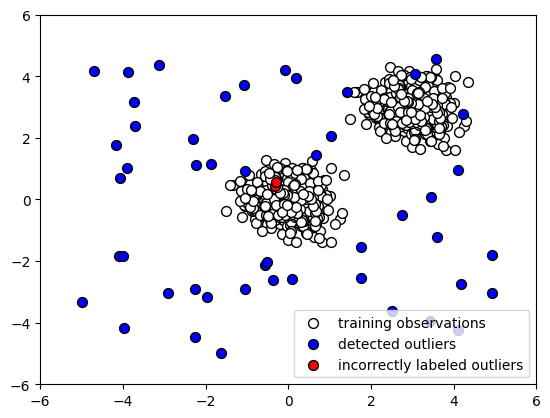

In [14]:
# Let's plot the isolation Forest predictions on the outliers to see how many it caught
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(
    X_outliers.loc[X_outliers.pred == -1, ["x"]],
    X_outliers.loc[X_outliers.pred == -1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    X_outliers.loc[X_outliers.pred == 1, ["x"]],
    X_outliers.loc[X_outliers.pred == 1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training observations", "detected outliers", "incorrectly labeled outliers"],
    loc="lower right",
)

plt.show()

In [15]:
# Now let's see how it performed on the normal testing data. Append the predicted label to x_test
X_test = X_test.assign(pred=y_pred_test)
X_test.head()

,x,y,pred
0,2.778772,3.470852,1
1,2.042210,2.915874,-1
2,4.351312,2.878281,-1
3,3.060331,3.394622,1
4,3.919364,2.093686,-1


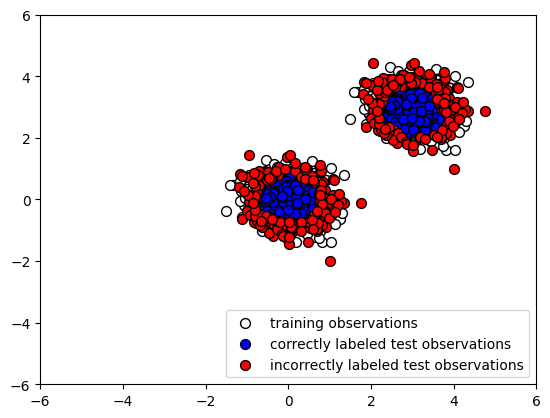

In [16]:
# Now let's plot the results to see whether our classifier labeled the normal testing data correctly.
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(
    X_test.loc[X_test.pred == 1, ["x"]],
    X_test.loc[X_test.pred == 1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    X_test.loc[X_test.pred == -1, ["x"]],
    X_test.loc[X_test.pred == -1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    [
        "training observations",
        "correctly labeled test observations",
        "incorrectly labeled test observations",
    ],
    loc="lower right",
)

plt.show()